**[LeetCode Link](https://leetcode-cn.com/problems/find-k-pairs-with-smallest-sums/solution/pyhont3yi-xing-jie-fa-dao-gao-xiao-jie-fa-by-ml-zi/)**

## 优先队列
它仅从矩阵左上角的第一对开始，然后根据需要从那里开始扩展。 每当将一对选择为输出结果时，该行中的下一对就会添加到当前选项的优先队列中。 同样，如果所选对是该行中的第一对，则将下一行中的第一对添加到队列中。
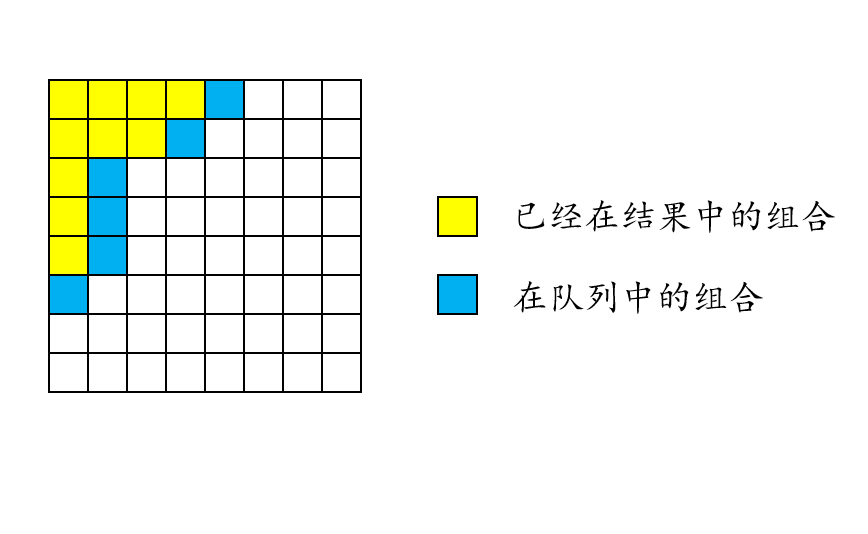

In [ ]:
class Solution:
    def kSmallestPairs(self, nums1: List[int], nums2: List[int], k: int) -> List[List[int]]:
        queue = []
        
        def push(i, j): 
            if i < len(nums1) and j < len(nums2): 
                heapq.heappush(queue, [nums1[i] + nums2[j], i, j])
        
        push(0, 0)
        res = []
        while queue and len(res) < k: 
            _, i, j = heapq.heappop(queue)
            res.append([nums1[i], nums2[j]])
            push(i, j + 1)
            if j == 0: 
                push(i + 1, 0)
        return res

## 优化的暴力
仍然遍历所有对，但仅使用生成器和使用大小为 k 的堆heapq.nsmallest。 因此，这仅需要 $\mathcal{O}(k)$ 的额外内存和 $\mathcal{O}(mn \log k)$ 的时间。

In [ ]:
import heapq
import itertools
class Solution:
    def kSmallestPairs(self, nums1, nums2, k):
        return map(list, heapq.nsmallest(k, itertools.product(nums1, nums2), key=sum))

In [ ]:
import heapq
class Solution:
    def kSmallestPairs(self, nums1: List[int], nums2: List[int], k: int) -> List[List[int]]:
        if not nums1 or not nums2: return []
        res = []
        head = []
        for i in nums1:
            for j in nums2:
                heapq.heappush(head,[i+j, i, j])
        for i in range(min(k,len(nums1)*len(nums2))):
            res.append(heapq.heappop(head)[-2:])
        return res